In [3]:
import torch
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
from IPython.display import display, Image


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
100%|██████████| 50/50 [00:03<00:00, 15.28it/s]


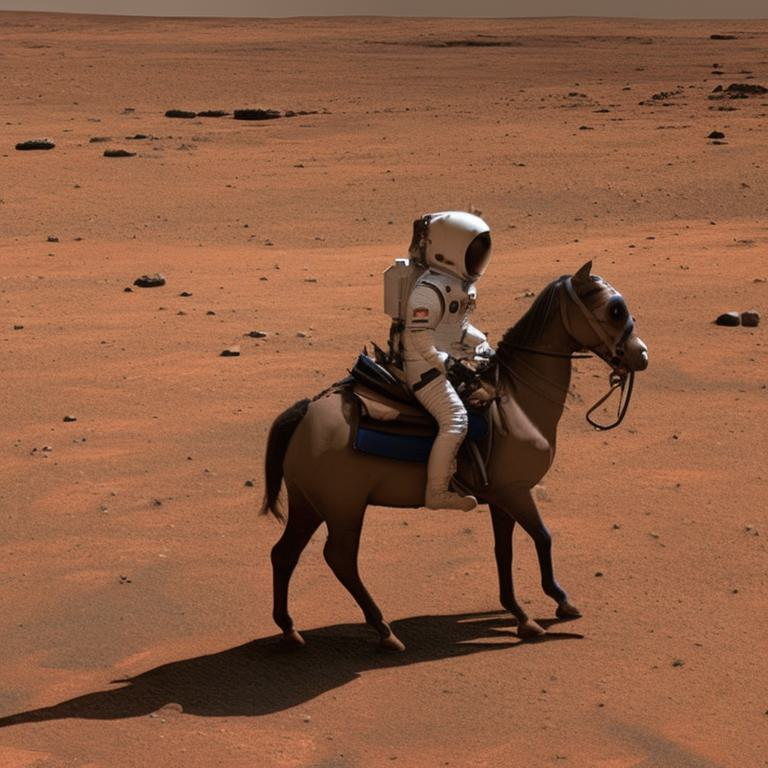

In [21]:

scheduler_path = "models/stable-diffusion/euler_scheduler"
pip_path = "models/stable-diffusion/euler_pipe.pt"

# Use the Euler scheduler here instead
scheduler = EulerDiscreteScheduler.from_pretrained(scheduler_path)
pipe = StableDiffusionPipeline.from_pretrained(pip_path, scheduler=scheduler, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]

image.save("image/astronaut_on_mars.jpg")

image_path = "image/astronaut_on_mars.jpg"
display(Image(filename=image_path))

# Protogen x3.4

In [1]:
from IPython.display import display, Image
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import torch

In [2]:
model_id = "darkstorm2150/Protogen_x3.4_Official_Release"
model_path = "saved_models/Protogen_x3.4"

pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")


  0%|          | 0/25 [00:00<?, ?it/s]

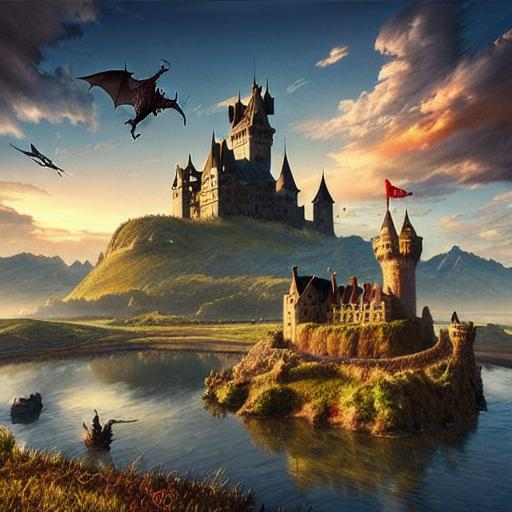

In [6]:
prompt = (
    "Photo realistic midevil landscape with a castle in the background and a dragon flying in the sky"
)


image = pipe(prompt, num_inference_steps=25).images[0]

image.save("./result.jpg")
display(Image(filename="./result.jpg"))


In [14]:
# pipe.save_pretrained(model_path)